# **SHAP (SHapley Additive exPlanations)**
https://github.com/slundberg/shap  
<img src='https://raw.githubusercontent.com/slundberg/shap/master/docs/artwork/shap_header.svg' width=800>

In [ ]:
from IPython.core.interactiveshell import InteractiveShell # 모든 명령어 출력
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML # 화면 좌우 크기 100%
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings # 파이썬 버전에 따른 오류 출력 방지
warnings.filterwarnings('ignore')

import pandas as pd # pandas
import numpy as np # numphy
import matplotlib.pyplot as plt # 시각화 matplob
import seaborn as sns; sns.set() # 시각화 seaborn
get_ipython().run_line_magic('matplotlib', 'inline') # 시각화 그림 자동 화면 출력
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 표시
plt.rcParams['axes.unicode_minus'] = False  #한글 폰트 사용시 마이너스 폰트 깨짐 해결

In [ ]:
!pip install shap

# 1  회귀생성 모델(Regression)

In [ ]:
import xgboost
import shap
# train an XGBoost model
X, y = shap.datasets.boston()
X.head()
y[0:10]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [ ]:
model = xgboost.XGBRegressor().fit(X, y)
explainer = shap.Explainer(model) # explainer = shap.Explainer(model, X)
shap_values = explainer(X)
shap_values[0]
shap_values[1]

[11:31:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


.values =
array([-5.1467264e-01, -2.0504883e-01,  6.6601284e-02, -2.6761726e-02,
        3.1532437e-01, -5.1843876e-01,  3.2404396e-03, -2.8673157e-02,
       -8.9909708e-01, -3.1519938e-01,  4.9955931e-01,  1.3651758e-01,
        5.6016159e+00], dtype=float32)

.base_values =
22.532942

.data =
array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

.values =
array([-0.33332354, -0.06292161, -0.17551032, -0.02794207,  0.32480034,
       -1.8400308 , -0.3488443 , -0.44961935, -0.25350043,  0.3386012 ,
        0.71119964,  0.07554361,  1.7569411 ], dtype=float32)

.base_values =
22.532942

.data =
array([2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
       6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
       1.7800e+01, 3.9690e+02, 9.1400e+00])

## 1. 개별 자료의 예측 SHAP Value 시각화
### 1.1 폭포형태(waterfall)
- 입력변수의 색깔 : red는 양의 영향, blue는 음의 방향으로 영향
- 입력변수의 색깔의 길이 : red는 양의 영향 크기, blue는 음의 방향으로 영향 크기
- 첫번째 iinstance의 모델 예측 값 24.019, (f(x))와 모델 예측 평균 22.243, (E[f(X)])

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


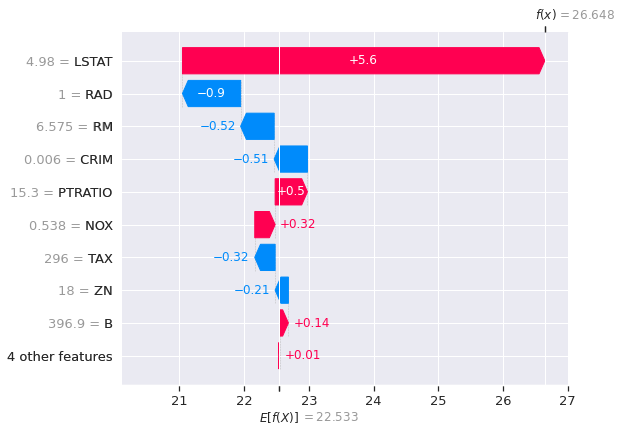

In [ ]:
shap.initjs()
shap.plots.waterfall(shap_values[0])

- 모델의 예측 값은 예측값의 평균 + SHAP Values
- $f(x)$ = $E[f(x)]$ + shap_values

In [ ]:
print(f'모델 예측 값의 평균, E[f(x)] = {np.mean(model.predict(X))}')
print(f'첫번째 인스턴스의 모델 예측 값 f(x) = {model.predict(X)[0]}')
print(f'첫번째 인스턴스의 SHAP 값 {shap_values[0].values}\n')
print(f'f(x) = {np.sum(shap_values[0].values) + np.mean(model.predict(X))}')

모델 예측 값의 평균, E[f(x)] = 22.532947540283203
첫번째 인스턴스의 모델 예측 값 f(x) = 26.647912979125977
첫번째 인스턴스의 SHAP 값 [-5.1467264e-01 -2.0504883e-01  6.6601284e-02 -2.6761726e-02
  3.1532437e-01 -5.1843876e-01  3.2404396e-03 -2.8673157e-02
 -8.9909708e-01 -3.1519938e-01  4.9955931e-01  1.3651758e-01
  5.6016159e+00]

f(x) = 26.64791488647461


### 2. 수평선 형태
- deeplearning의 경우 DeepExplainer를 적용하면 가능

#### Use Case
- SHAP provides multiple explainers for different kind of models.
     * TreeExplainer: Support XGBoost, LightGBM, CatBoost and scikit-learn models by Tree SHAP.
     * DeepExplainer (DEEP SHAP): Support TensorFlow and Keras models by using DeepLIFT and Shapley values.
     * GradientExplainer: Support TensorFlow and Keras models.
     * KernelExplainer (Kernel SHAP): Applying to any models by using LIME and Shapley values.

In [ ]:
explainer = shap.TreeExplainer(model) 
shap_values = explainer.shap_values(X)
shap.initjs()
shap.plots.force(explainer.expected_value, shap_values[0])

## 2. 전체 자료(특성변수)의 SHAP value 시각화

If we take many force plot explanations such as the one shown above, rotate them 90 degrees, and then stack them horizontally, we can see explanations for an entire dataset (in the notebook this plot is interactive):

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values)

Visualize the sub set of dataset

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:89,:], X.iloc[:89,:])

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0])
shap_values[0]

array([-5.1467264e-01, -2.0504883e-01,  6.6601284e-02, -2.6761726e-02,
        3.1532437e-01, -5.1843876e-01,  3.2404396e-03, -2.8673157e-02,
       -8.9909708e-01, -3.1519938e-01,  4.9955931e-01,  1.3651758e-01,
        5.6016159e+00], dtype=float32)

### 모든 데이터(features, targets)의 SHAP value

In [ ]:
data = pd.DataFrame(shap_values, columns = X.columns)
data['SUM'] = data.sum(1)  # 특성 변수의 SHAP values
data['f(x)'] = model.predict(X)
data['E[f(x)]'] = np.mean(model.predict(X))
data['SUM + E[f(x)]'] = data['SUM'] + data['E[f(x)]']
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,SUM,f(x),E[f(x)],SUM + E[f(x)]
0,-0.514673,-0.205049,0.066601,-0.026762,0.315324,-0.518439,0.003240,-0.028673,-0.899097,-0.315199,0.499559,0.136518,5.601616,4.114967,26.647913,22.532948,26.647915
1,-0.333324,-0.062922,-0.175510,-0.027942,0.324800,-1.840031,-0.348844,-0.449619,-0.253500,0.338601,0.711200,0.075544,1.756941,-0.284606,22.248341,22.532948,22.248341
2,-0.296150,-0.061967,-0.321561,-0.026762,0.548051,4.635937,0.091592,-0.626156,-0.216066,0.363916,0.303475,0.193537,6.951335,11.539183,34.072117,22.532948,34.072128
3,-0.410223,-0.035985,0.176725,-0.022671,0.525452,3.499309,0.221952,-0.541913,-0.077966,1.166461,-0.044148,0.193493,7.131547,11.782032,34.314983,22.532948,34.314980
4,0.515067,-0.023720,0.335918,-0.021110,0.503775,4.726755,0.262816,-0.256377,-0.077583,1.554194,0.122836,0.242870,5.072463,12.957905,35.490849,22.532948,35.490852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.204297,-0.186425,0.038872,-0.026762,0.321638,0.170341,0.125082,0.318146,-0.935701,-0.126404,-1.447829,0.167865,0.822006,-0.963469,21.569481,22.532948,21.569479
502,-0.428417,-0.198296,0.036092,-0.027942,0.209514,-1.865914,-0.430028,0.155317,-0.973136,-0.155173,-1.196259,0.087900,1.764396,-3.021945,19.511005,22.532948,19.511003
503,-0.510806,-0.189549,0.037906,-0.027942,0.378386,2.952734,-0.862251,0.236891,-1.068543,-0.200744,-1.483011,0.069679,2.879114,2.211864,24.744808,22.532948,24.744812
504,0.318530,-0.185963,0.039767,-0.026381,0.290305,0.302909,-0.542731,0.217116,-1.068543,-0.193594,-1.508986,0.155437,2.664307,0.462174,22.995121,22.532948,22.995121


### SHAP summary plot 해석하기

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


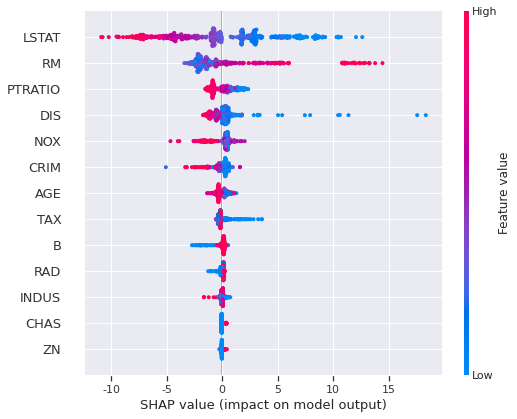

In [ ]:
shap.summary_plot(shap_values, X)

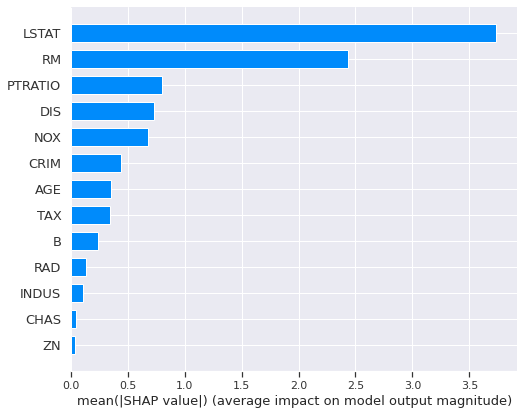

In [ ]:
shap.summary_plot(shap_values, X, plot_type="bar")

# End